# Luminosity Template
### This template plots the luminosity function of the Milky Way satellites along with the observations

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import h5py
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
from scipy.optimize import curve_fit
import pandas as pd

In [5]:
f=h5py.File('/media/sachiwee/ArmorATD/Fornax/EPS_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_indexShift_Fornax.hdf5','r')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/media/sachiwee/ArmorATD/Fornax/EPS_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_indexShift_Fornax.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [6]:
list(f['Outputs']['Output1']['nodeData'].keys())

NameError: name 'f' is not defined

In [7]:
# Import Drlica-Wagner data
data_up=pd.read_fwf('/Users/sachiwee/observations/MW_updated_obs_.txt', skiprows=70,header=None,delimiter=' ')

mask_wagner=data_up.loc[:,11]<400.0
Mv_wagner=data_up.loc[:,13]

FileNotFoundError: [Errno 2] No such file or directory: '/home/sachiwee/observations/MW_updated_obs_.txt'

In [5]:

#Import McConnachie 2012 data
t = fits.getdata('/Users/sachiwee/Downloads/NearbyGalaxies_Jan2021_PUBLIC.fits', 1)
data = Table(t)

#Calculate (apparent magnitude-Absolute magnitude)
mM=data['dmod']

#Get E(b-v)
a=data['EB-V']

#Calculate distances
exp_distance=(mM)/5.0
do=10*(10.0**exp_distance)
dp=(10.0**((mM+data['dmod+']+5.0-a)/5.0))-do
dm=do-(10.0**((mM-data['dmod-']+5.0-a)/5.0))

#mask satellites within 400 kpc
mask=((do/1000.0)<400.0) 

# Calculate absolute magnitude
Mv=data['Vmag']-mM

#Errors
Mvp=np.sqrt(data['Vmag+']**2.0+data['dmod+']**2.0)
Mvm=np.sqrt(data['Vmag+']**2.0+data['dmod-']**2.0)

#Get iron
FeH=data['[Fe/H]']

fehp=data['feh+']
fehm=data['feh-']

#replace unphysical errors with highest error bars possible i.e. 0.5
for i in range(len(fehp)):
    if (fehp[i]==999.0):
        fehp[i]=0.5
    
for j in range(len(fehm)):
    if (fehm[j]==999.0):
        fehm[j]=0.5  
        
#luminosity
exp=((Mv-4.83)/(-2.5))

expp=((Mv+Mvp-4.83)/(-2.5))

L=10.0**exp
m=(FeH[mask]<999)&(Mv[mask]<999)


extra=[31,45,30]
for i in range(len(Mv[mask])):
    if(data['GalaxyName'][mask][i]=='SMC             '):
        print(data['GalaxyName'][mask][i],Mv[mask][i])
        
mask_magellanic=(data['GalaxyName'][mask]!='SMC             ')
mask_magellanic=np.logical_and((data['GalaxyName'][mask]!='LMC             '),mask_magellanic)


SMC              -16.83
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True]


In [6]:
for i in extra:
    print(Mv_wagner[mask_wagner][i])
    Mv_observed=np.append(Mv[mask],Mv_wagner[mask_wagner][i])

-4.8
-5.2
-3.32


In [7]:

list(data['GalaxyName'][mask][mask_magellanic])

['*Bootes3        ',
 '*CanisMajor     ',
 '*Cetus2         ',
 '*Columba1       ',
 '*Draco2         ',
 '*Eridanus3      ',
 '*Grus1          ',
 '*Grus2          ',
 '*Horologium1    ',
 '*Horologium2    ',
 '*Hydra1         ',
 '*Indus1         ',
 '*Indus2         ',
 '*Pegasus3       ',
 '*Phoenix2       ',
 '*Pictor1        ',
 '*Reticulum2     ',
 '*Reticulum3     ',
 '*Sagittarius2   ',
 '*Triangulum2    ',
 '*Tucana3        ',
 '*Tucana4        ',
 '*Tucana5        ',
 'Antlia2         ',
 'Aquarius2       ',
 'Bootes(1)       ',
 'Bootes2         ',
 'Bootes4         ',
 'CanesVenatici(1)',
 'CanesVenatici2  ',
 'Carina          ',
 'Carina2         ',
 'Carina3         ',
 'Centaurus1      ',
 'Cetus3          ',
 'ComaBerenices   ',
 'Crater2         ',
 '*DESJ0225+0304  ',
 'Draco           ',
 'Eridanus2       ',
 'Fornax          ',
 'Hercules        ',
 'Hydra2          ',
 'Hydrus1         ',
 'Leo1            ',
 'Leo2            ',
 'Leo4            ',
 'Leo5       

In [9]:
#Import data from Justice League hydro simulation data
# JL=ascii.read('/home/sachiwee/simulations/MW/50M/d.4096/JusticeLeague.csv')
JL=np.genfromtxt('/home/sachiwee/simulations/MW/50M/d.4096/JusticeLeague.txt',names=True)

JL.dtype
Mv_sandra=JL['M_V']
N_sandra=JL['NM_VSandra']
N_elena=JL['NM_VElena']

In [10]:

#Import FIRE 2 data
fire=np.genfromtxt('/media/sachiwee/ArmorATD/FIRE/absolute_magnitudes_FIRE_m12f_m12m_m12i.txt',names=True)
m12f=fire['m12f']
m12m=fire['m12m']
m12i=fire['m12i']

Mv_N_lsr0,Mv_base_lsr0=np.histogram(m12f[m12f!=0],bins=np.linspace(-24,2,50))
cum_Mv_lsr0=np.cumsum(Mv_N_lsr0)

Mv_N_lsr1,Mv_base_lsr1=np.histogram(m12m[m12m!=0],bins=np.linspace(-24,2,50))
cum_Mv_lsr1=np.cumsum(Mv_N_lsr1)

Mv_N_lsr2,Mv_base_lsr2=np.histogram(m12i[m12i!=0],bins=np.linspace(-24,2,50))
cum_Mv_lsr2=np.cumsum(Mv_N_lsr2)

In [11]:
def plotMv(name,fig,c,label1,obs,col,row,num):
    '''This function takes in a GALACTICUS file and extracts V mag to plot the luminosity function'''
    '''Inputs: file, axes, color,label for property, obs or gal, column, row and number for the axes           '''
#     ax.set_facecolor('k')
    f=h5py.File(name,'r')
    ax=fig.add_subplot(col,row,num)
    
    mass_dm=f['Outputs']['Output1']['nodeData']['basicMass'][:]
   
    l=np.argmax(mass_dm)
    Lg=f['Outputs']['Output1']['nodeData']['spheroidLuminositiesStellar:SDSS_g:observed:z0.0000'][:]+f['Outputs']['Output1']['nodeData']['diskLuminositiesStellar:SDSS_g:observed:z0.0000'][:]

    Mg=-2.5*np.log10(Lg)
    print(mass_dm[l])
    print(mass_dm[l]*.7)
    
    x=f['Outputs']['Output1']['nodeData']['positionPositionX'][:]-f['Outputs']['Output1']['nodeData']['positionPositionX'][:][l]
    y=f['Outputs']['Output1']['nodeData']['positionPositionY'][:]-f['Outputs']['Output1']['nodeData']['positionPositionY'][:][l]
    z=f['Outputs']['Output1']['nodeData']['positionPositionZ'][:]-f['Outputs']['Output1']['nodeData']['positionPositionZ'][:][l]
    d=np.sqrt(x**2.0+y**2.0+z**2.0)
    satellite_mask=(d<0.400)&(mass_dm<np.amax(mass_dm))
    
    Mv_N,Mv_base=np.histogram(Mv_observed,bins=np.linspace(-24,2,30))
    Mv_N_wagner,Mv_base_wagner=np.histogram(Mv_wagner[mask_wagner],bins=np.linspace(-24,2,30))
    
    Mg_N,Mg_base=np.histogram(Mg[satellite_mask],bins=np.linspace(-24,2,30))
    cum_Mv=np.cumsum(Mv_N)
    cum_Mv_wagner=np.cumsum(Mv_N_wagner)
    cum_Mg=np.cumsum(Mg_N)
    
    
    
    if(obs=='obs'):
#         ax.hist(Mv[mask],bins=np.linspace(-20,2,50),cumulative=1,histtype='step',color='b',linewidth=3,linestyle='--',label='MW',alpha=0.7)
        ax.plot(Mv_base[0:29],cum_Mv,color='forestgreen',linewidth=3,linestyle='--',label='MW (McConnachie 2012, Drlica-Wagner+2020)')

        ax.plot(Mv_sandra,N_elena,color='orange',linewidth=3,linestyle='-.',label='Justice League Elena   (Applebaum et al. 2021)')
        ax.plot(Mv_sandra,N_sandra,color='coral',linewidth=3,linestyle='-.',label='Justice League Sandra (Applebaum et al. 2021)')

        ax.plot(Mv_base_lsr0[0:49],cum_Mv_lsr0,color='lightskyblue',linewidth=2.5,linestyle='-.',label='m12f   (Shipp et al. 2022)')
        ax.plot(Mv_base_lsr1[0:49],cum_Mv_lsr1,color='cornflowerblue',linewidth=2.5,linestyle='-.',label='m12m (Shipp et al. 2022)')
        ax.plot(Mv_base_lsr2[0:49],cum_Mv_lsr2,color='royalblue',linewidth=2.5,linestyle='-.',label='m12i   (Shipp et al. 2022)')
    else:
        if(label1=='$v_{cooling}=17 km/s$'):
            label1='\bf{$v_{cooling}=17 \;km/s$}'
            ax.hist(Mg[satellite_mask],bins=np.linspace(-24,2,50),cumulative=True,histtype='step',color=c,linewidth=3,label=label1,linestyle='-',zorder=2)
        else:
#            
              ax.plot(Mg_base[0:29],cum_Mg,color=c,linewidth=4,linestyle='-',label=label1)
    ax.set_ylabel('$\mathcal{N}\;(<\,\mathcal{M}_V)$',fontsize=20,color='k')
    ax.set_xlabel('$\mathcal{M}_V$',fontsize=20,color='k')
    
    ms=(Mg[satellite_mask]<-3)&(Mg[satellite_mask]>-25)
    
    ax.set_xlim(-24,2)
    
    ax.set_yscale('log')
    ax.invert_xaxis()
    ax.set_xticks(np.linspace(-24,2,14))
    
    ax1 = ax.twiny()
    minL=4/2.5
    maxL=22/2.5
    ax1.set_xlim(10**minL,10**maxL)

    ax1.plot(np.logspace(minL,maxL,10), 1e8*np.ones(len(np.linspace(-22,-4,10))),c='w')
    Lstr=[r'$6.3\times10^8$',r'$1\times10^8$',r'$1.5\times10^7$',r'$2.5\times10^6$',r'$3.9\times10^5$',r'$6.3\times10^4$',r'$1\times10^4$',
     r'$1.5\times10^3$',r'$2.5\times10^2$',r'$3.9\times10^1$']

    ax1.set_xlabel('$\mathcal{L}\;(\mathcal{L}_{\odot})$',fontsize=15,color='k')
    ax1.xaxis.set_tick_params(labelsize=10,labelcolor='k',labeltop=True)
    ax1.set_ylim(1,1e2)
    ax1.set_xscale('log')
    

    ax.xaxis.set_tick_params(labelsize=15,labelcolor='k')
    ax.yaxis.set_tick_params(labelsize=15,labelcolor='k')

    
    return ax

def plotMv1(name,fig,c,label1,obs,col,row,num):
    '''This function takes in a GALACTICUS file and extracts V mag to plot the luminosity function'''
    '''Inputs: file, axes, color,label for property, obs or gal                                   '''
#     ax.set_facecolor('k')
    f=h5py.File(name,'r')
    ax=fig.add_subplot(col,row,num)
    
    mass_dm=f['Outputs']['Output1']['nodeData']['basicMass'][:]
   
    l=np.argmax(mass_dm)
    Lg=f['Outputs']['Output1']['nodeData']['spheroidLuminositiesStellar:SDSS_g:observed:z0.0000'][:]+f['Outputs']['Output1']['nodeData']['diskLuminositiesStellar:SDSS_g:observed:z0.0000'][:]

    Mg=-2.5*np.log10(Lg)

    
    x=f['Outputs']['Output1']['nodeData']['positionPositionX'][:]-f['Outputs']['Output1']['nodeData']['positionPositionX'][:][l]
    y=f['Outputs']['Output1']['nodeData']['positionPositionY'][:]-f['Outputs']['Output1']['nodeData']['positionPositionY'][:][l]
    z=f['Outputs']['Output1']['nodeData']['positionPositionZ'][:]-f['Outputs']['Output1']['nodeData']['positionPositionZ'][:][l]
    d=np.sqrt(x**2.0+y**2.0+z**2.0)
    satellite_mask=(d<0.4)&(mass_dm<1e12)
    
    Mv_N,Mv_base=np.histogram(Mv,bins=np.linspace(-24,2,30))
    Mg_N,Mg_base=np.histogram(Mg,bins=np.linspace(-24,2,30))
    cum_Mv=np.cumsum(Mv_N)
    cum_Mg=np.cumsum(Mg_N)
    if(obs=='obs'):
#         ax.hist(Mv[mask],bins=np.linspace(-20,2,50),cumulative=1,histtype='step',color='b',linewidth=3,linestyle='--',label='MW',alpha=0.7)
        ax.plot(Mv_base[0:29],cum_Mv,color='seagreen',linewidth=4,linestyle='--',label='MW')
        ax.plot(base148[0:29],N148,color='coral',linewidth=2,linestyle='-.',label='Justice League Elena  (Applebaum et al. 2021)')
        ax.plot(base229[0:29],N229,color='orange',linewidth=2,linestyle='-.',label='Justice League Sandra (Applebaum et al. 2021)')
#         ax.plot(base229,N229,color='orange',linewidth=2,linestyle='-.',label='Justice League 229',alpha=0.7)
        
    else:
        if(label1=='$v_{cooling}=17 km/s$'):
            label1='\bf{$v_{cooling}=17 \;km/s$}'
            ax.hist(Mg,bins=np.linspace(-24,2,50),cumulative=True,histtype='step',color=c,linewidth=3,label=label1,linestyle='-',zorder=2)
        else:
#             ax.hist(Mg[satellite_mask],bins=np.linspace(-20,2,50),cumulative=True,histtype='step',color=c,linewidth=3,label=label1,linestyle='-')
              ax.plot(Mg_base[0:29],cum_Mg,color=c,linewidth=4,linestyle='-',label=label1)
    ax.set_ylabel('$\mathcal{N}\;(<\,\mathcal{M}_V)$',fontsize=20,color='k')
    ax.set_xlabel('$\mathcal{M}_V$',fontsize=20,color='k')
    ms=(Mg[satellite_mask]<-3)&(Mg[satellite_mask]>-25)
    
    ax.set_xlim(-24,2)
    ax.set_yscale('log')
    ax.invert_xaxis()
    ax1 = ax.twinx()
    ax1.set_xticks( ax.get_xticks() )
    ax1.set_xbound(ax.get_xbound())
    ax1.set_xticklabels([10**(x/-2.5) for x in ax.get_xticks()])
    ax1.set_xlabel('$\mathcal{L}_{\odot}$',fontsize=20,color='k')
    ax.xaxis.set_tick_params(labelsize=15,labelcolor='k')
    ax.yaxis.set_tick_params(labelsize=15,labelcolor='k')
    leg=ax.legend(fontsize=9,loc='top right')
#     plt.setp(leg.get_texts(), color='w')
    frame = leg.get_frame()
#     frame.set_color('k')
    
    return ax



In [12]:
def plotMv_eps(name,fig,c,label1,obs,col,row,num):
    '''This function takes in a GALACTICUS file and extracts V mag to plot the luminosity function'''
    '''Inputs: file, axes, color,label for property, obs or gal, column, row and number for the axes           '''
#     ax.set_facecolor('k')
    f=h5py.File(name,'r')
    ax=fig.add_subplot(col,row,num)
    
    mass_dm=f['Outputs']['Output1']['nodeData']['basicMass'][:]
   
    l=np.argmax(mass_dm)
    Lg=f['Outputs']['Output1']['nodeData']['spheroidLuminositiesStellar:DES_g:observed:z0.0000'][:]+f['Outputs']['Output1']['nodeData']['diskLuminositiesStellar:DES_g:observed:z0.0000'][:]

    Mg=-2.5*np.log10(Lg)

    
    satellite_mask=mass_dm<np.amax(mass_dm)
    
    Mv_N,Mv_base=np.histogram(Mv_observed,bins=np.linspace(-24,2,30))
    Mv_N_wagner,Mv_base_wagner=np.histogram(Mv_wagner[mask_wagner],bins=np.linspace(-24,2,30))
    
    Mg_N,Mg_base=np.histogram(Mg[satellite_mask],bins=np.linspace(-24,2,30))
    cum_Mv=np.cumsum(Mv_N)
    cum_Mv_wagner=np.cumsum(Mv_N_wagner)
    cum_Mg=np.cumsum(Mg_N)
    if(obs=='obs'):
#         ax.hist(Mv[mask],bins=np.linspace(-20,2,50),cumulative=1,histtype='step',color='b',linewidth=3,linestyle='--',label='MW',alpha=0.7)
        ax.plot(Mv_base[0:29],cum_Mv,color='seagreen',linewidth=3,linestyle='--',label='MW (McConnachie 2012)')

    else:
        if(label1=='$v_{cooling}=17 km/s$'):
            label1='\bf{$v_{cooling}=17 \;km/s$}'
            ax.hist(Mg,bins=np.linspace(-24,2,50),cumulative=True,histtype='step',color=c,linewidth=3,label=label1,linestyle='-',zorder=2)
        else:
#       
              ax.plot(Mg_base[0:29],cum_Mg,color=c,linewidth=3,linestyle='-',label=label1)
    ax.set_ylabel('$\mathcal{N}(<M_V)$',fontsize=25,color='k')
    ax.set_xlabel('$\mathcal{M}_V$',fontsize=25,color='k')
    
    
    ax.set_xlim(-24,2)
    ax.set_yscale('log')
    ax.invert_xaxis()
    ax.set_xticks(np.linspace(-24,2,14))
    ax.xaxis.set_tick_params(labelsize=20,labelcolor='k')
    ax.yaxis.set_tick_params(labelsize=20,labelcolor='k')
    leg=ax.legend(fontsize=15,loc='upper right')
#     plt.setp(leg.get_texts(), color='w')
    frame = leg.get_frame()
    
    ax1 = ax.twiny()
    minL=4/2.5
    maxL=22/2.5
    ax1.set_xlim(10**minL,10**maxL)
#     ax1.set_xticks(np.logspace(1,10,10))
    ax1.plot(np.logspace(minL,maxL,10), 1e8*np.ones(len(np.linspace(-22,-4,10))),c='w')
    Lstr=[r'$6.3\times10^8$',r'$1\times10^8$',r'$1.5\times10^7$',r'$2.5\times10^6$',r'$3.9\times10^5$',r'$6.3\times10^4$',r'$1\times10^4$',
     r'$1.5\times10^3$',r'$2.5\times10^2$',r'$3.9\times10^1$']
#     ax1.set_xticklabels(fontsize=8)
    ax1.set_xlabel('$\mathcal{L}\;(\mathcal{L}_{\odot})$',fontsize=15,color='k')
    ax1.xaxis.set_tick_params(labelsize=10,labelcolor='k',labeltop=True)
    ax1.set_ylim(1,1e4)
    ax1.set_xscale('log')
#     frame.set_color('k')
    print(np.shape([]))
    return ax



<IPython.core.display.Javascript object>


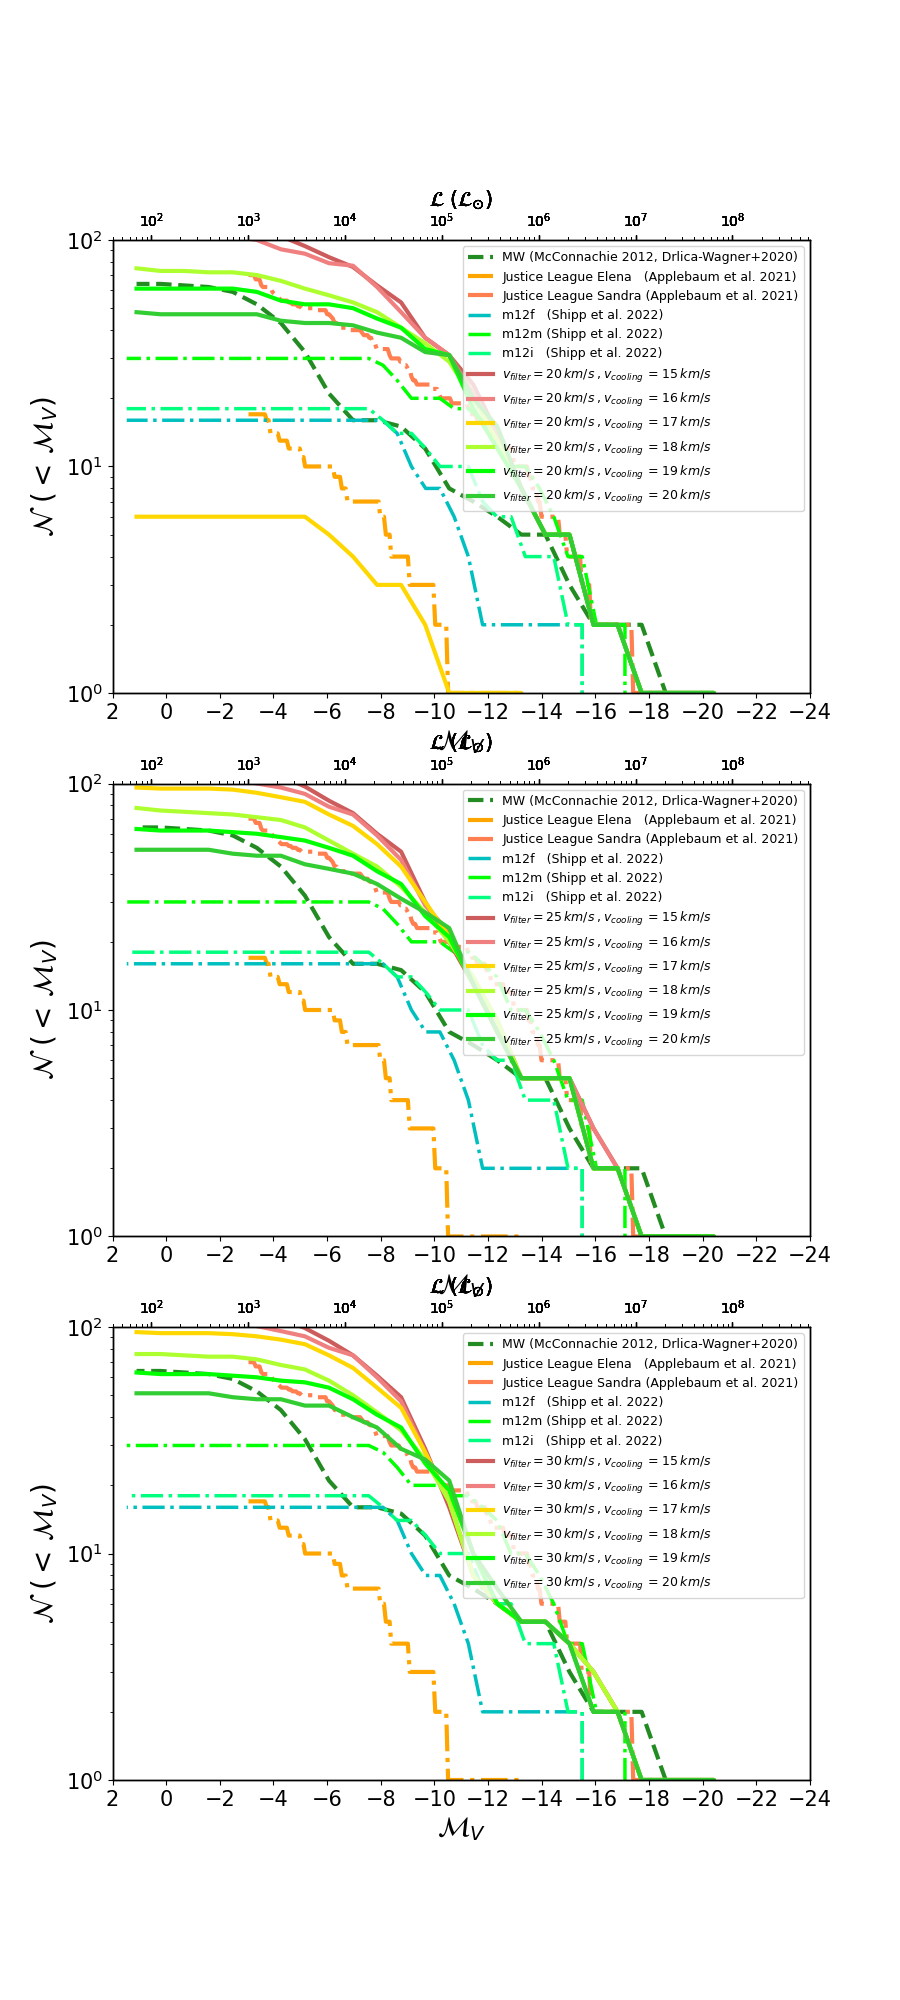

/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in less
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/pyth

1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


168158076863.29922
117710653804.30945


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in less
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater
/home/sachiwee/anaconda3/lib/pyth

1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in less
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/pyth

1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in less
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/pyth

1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in less
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/pyth

1771588847190.9556
1240112193033.6687


In [75]:
%matplotlib notebook
fig=plt.figure(figsize=(9,20))
# ax=fig.add_subplot(111)
# ax1=fig.add_subplot(122)
fig.patch.set_facecolor('w')
# plotMv('/media/sachiwee/ArmorATD/GAL_outputs/MW/50M/d.4096/AHFoutputs/MW_zR9_vF30/non_MWoutputs/vFcooling/vFcooling/HI/SFR/newruns/grid_cv/MW_zR9_vF30_17lspnv_cV60_60_e1.5_2.1_blitz_fit_nonMWoutputs/vFcooling/vFcooling_HI_rP0.01_cold_AGNchanges_tidal.hdf5',fig,'aquamarine','$v_{cooling}=15 \;km/s$','obs',1,2,1)



plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig,'gold','original, z','obs',3,1,1)

plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig,'indianred','$v_{filter}=20\,km/s\;,v_{cooling}\,=\,15\,km/s$','gal',3,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling16_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig,'lightcoral','$v_{filter}=20\,km/s\;,v_{cooling}\,=\,16\,km/s$','gal',3,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling17_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig,'gold','$v_{filter}=20\,km/s\;,v_{cooling}\,=\,17\,km/s$','gal',3,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling18_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'greenyellow','$v_{filter}=20\,km/s\;,v_{cooling}\,=\,18\,km/s$','gal',3,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'lime','$v_{filter}=20\,km/s\;,v_{cooling}\,=\,19\,km/s$','gal',3,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling20_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'limegreen','$v_{filter}=20\,km/s\;,v_{cooling}\,=\,20\,km/s$','gal',3,1,1)

plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig,'gold','original, z','obs',3,1,2)

plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'indianred','$v_{filter}=25\,km/s\;,v_{cooling}\,=\,15\,km/s$','gal',3,1,2)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling16_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'lightcoral','$v_{filter}=25\,km/s\;,v_{cooling}\,=\,16\,km/s$','gal',3,1,2)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling17_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'gold','$v_{filter}=25\,km/s\;,v_{cooling}\,=\,17\,km/s$','gal',3,1,2)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling18_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'greenyellow','$v_{filter}=25\,km/s\;,v_{cooling}\,=\,18\,km/s$','gal',3,1,2)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig,'lime','$v_{filter}=25\,km/s\;,v_{cooling}\,=\,19\,km/s$','gal',3,1,2)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling20_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'limegreen','$v_{filter}=25\,km/s\;,v_{cooling}\,=\,20\,km/s$','gal',3,1,2)


plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig,'gold','original, z','obs',3,1,3)

plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'indianred','$v_{filter}=30\,km/s\;,v_{cooling}\,=\,15\,km/s$','gal',3,1,3)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling16_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'lightcoral','$v_{filter}=30\,km/s\;,v_{cooling}\,=\,16\,km/s$','gal',3,1,3)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling17_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'gold','$v_{filter}=30\,km/s\;,v_{cooling}\,=\,17\,km/s$','gal',3,1,3)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling18_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'greenyellow','$v_{filter}=30\,km/s\;,v_{cooling}\,=\,18\,km/s$','gal',3,1,3)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'lime','$v_{filter}=30\,km/s\;,v_{cooling}\,=\,19\,km/s$','gal',3,1,3)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling20_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig,'limegreen','$v_{filter}=30\,km/s\;,v_{cooling}\,=\,20\,km/s$','gal',3,1,3)
fig.savefig('/media/sachiwee/ArmorATD/MW_MAC/figures/Mv_cooling_vF_400kpc.pdf')


<IPython.core.display.Javascript object>


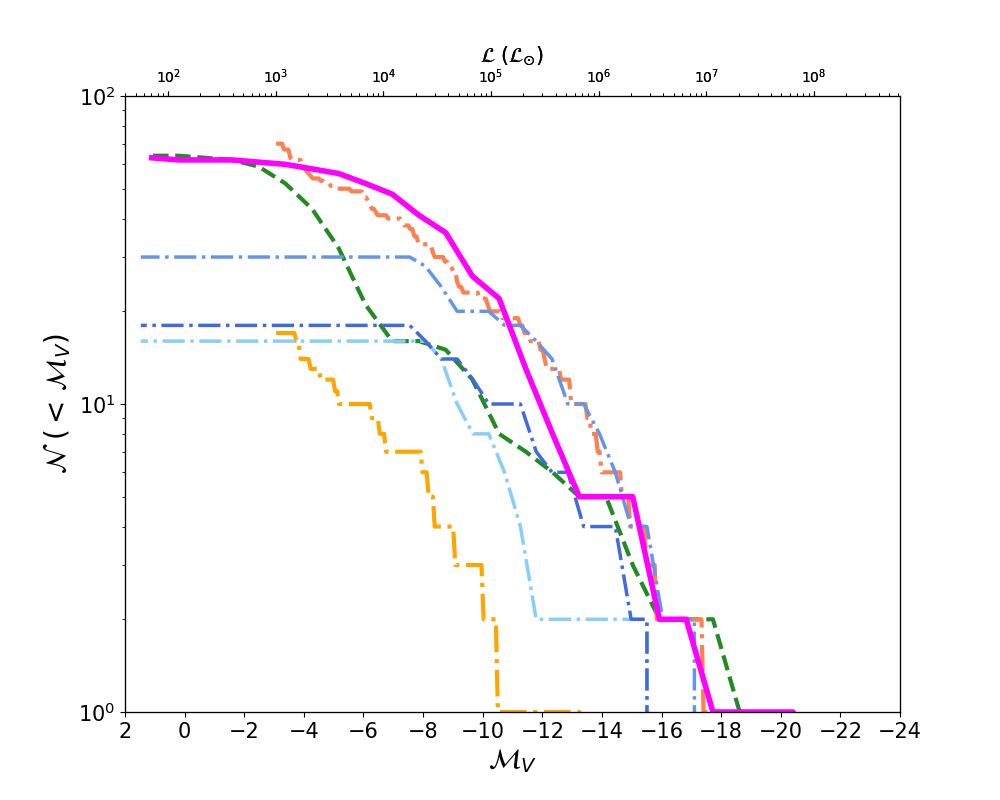

/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


In [13]:
fig1=plt.figure(figsize=(10,8))
# plotMv('/media/sachiwee/ArmorATD/Fornax/EPS_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_indexShift_Fornax.hdf5',fig1,'fuchsia','MW','obs',1,1,1)
# name,fig,c,label1,obs,col,row,num
plotMv('/media/sachiwee/ArmorATD/MW_testruns/instantaneous/MW_blitz_z_e1.6_0.2_cooling_coldmode_starvesatsF_spnv_hl_ode.hdf5',fig1,'FUCHSIA','MW (Default,ins, $e_{disk,sph}=1.6,0.4$, SNe, Cooling= 17 km/s)','obs',1,1,1)

# plotMv_eps('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs_6_11_22/EPS_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_indexShift_MW_res_correct1.hdf5',fig1,'darkorchid',r'MW (Galacticus, EPS)','gal',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs_6_11_22/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_vdis_indexShift_test2.hdf5',fig1,'fuchsia',r'MW (Galacticus)','gal',1,1,1)
# plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/tidal1/tidal1/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal1_ode_sfh390_vdis.hdf5',fig1,'orchid',r'MW ($\beta_{tidal}\,=\,0.10$)','gal',1,1,1)
# plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/tidal1/tidal1/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal100_ode_sfh390_vdis.hdf5',fig1,'darkorchid',r'MW ($\beta_{tidal}=1.00$)','gal',1,1,1)
# plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_vdis_indexShift_virialR.hdf5',fig1,'darkorchid',r'MW (No ram pressure stripping)','gal',1,1,1)
# plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs_6_11_22/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_vdis_indexShift_test2.hdf5',fig1,'fuchsia',r'MW (Font et al. 2008, $\beta_{ram}\,=\,1.00$)','gal',1,1,1)
# plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs_6_11_22/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_vdis_indexShift_correct_AGN.hdf5',fig1,'royalblue',r'MW (AGN adjusted)','gal',1,1,1)
# plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/ram1/ram1/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram01_tidal01_ode_sfh390_vdis.hdf5',fig1,'royalblue',r'MW (Font et al. 2008, $\beta_{ram}\,=\,0.01$)','gal',1,1,1)
# plotMv('/media/sachiwee/ArmorATD/MW_testruns/instantaneous/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram01_tidal100_ode_vel300.hdf5',fig1,'darkorchid',r'MW ($\beta_{tidal}=1.00$)','gal',1,1,1)
# plotMv_eps('/media/sachiwee/ArmorATD/Fornax/EPS_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_indexShift_Fornax.hdf5',fig1,'fuchsia',r'Fornax (EPS)','obs',1,1,1)
# plotMv_eps('/media/sachiwee/ArmorATD/Fornax/EPS_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_indexShift_Fornax.hdf5',fig1,'fuchsia',r'Fornax (EPS)','gal',1,1,1)
# 
# plotMv('/media/sachiwee/ArmorATD/EPS_o/MW_original_z_cooling_ode.hdf5',fig1,'fuchsia','z, cooling (old)','gal',1,1,1)
fig1.savefig('/media/sachiwee/ArmorATD/MW_MAC/Mv_aas.png')

<IPython.core.display.Javascript object>


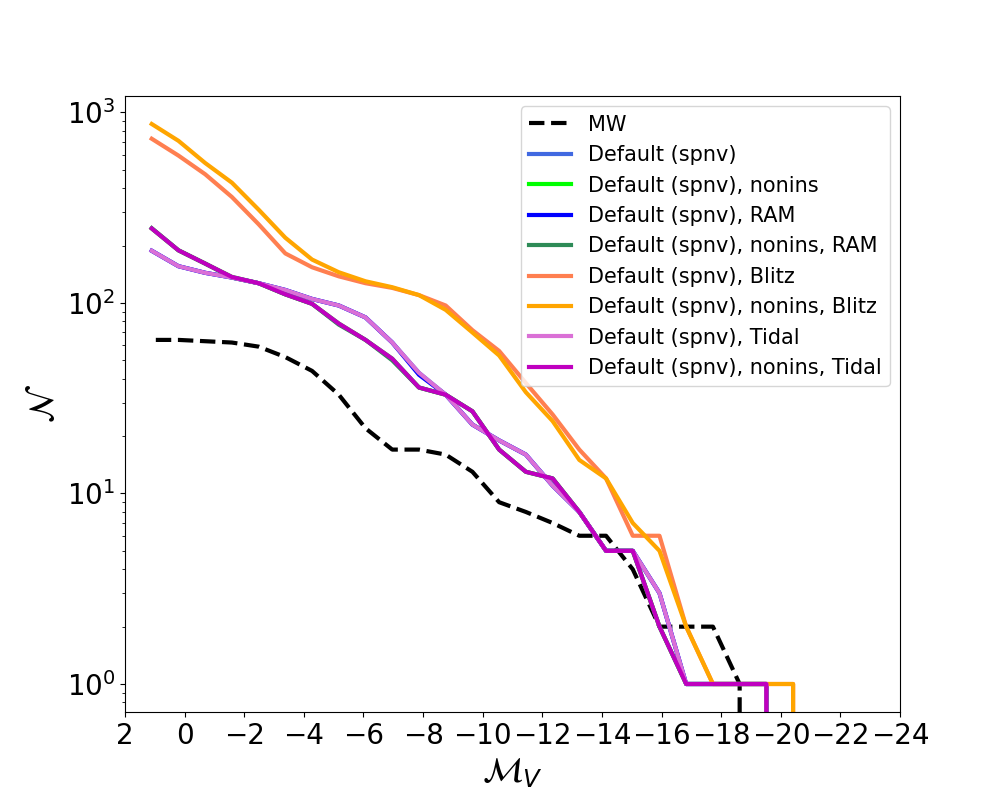

/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, t

In [9]:
fig2=plt.figure(figsize=(10,8))
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_spnv_coldmode_ode.hdf5',fig2,'fuchsia','Default (spnv)','obs',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_spnv_coldmode_ode.hdf5',fig2,'royalblue','Default (spnv)','gal',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_nonins_spnv_coldmode_ode.hdf5',fig2,'lime','Default (spnv), nonins','gal',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_spnv_coldmode_rP_ode.hdf5',fig2,'b','Default (spnv), RAM','gal',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_nonins_spnv_coldmode_rP_ode.hdf5',fig2,'seagreen','Default (spnv), nonins, RAM','gal',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_blitz_spnv_coldmode_ode.hdf5',fig2,'coral','Default (spnv), Blitz','gal',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_nonins_blitz_spnv_coldmode_ode.hdf5',fig2,'orange','Default (spnv), nonins, Blitz','gal',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_spnv_coldmode_tidal_ode.hdf5',fig2,'orchid','Default (spnv), Tidal','gal',1,1,1)
plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_nonins_spnv_coldmode_tidal_ode.hdf5',fig2,'m','Default (spnv), nonins, Tidal','gal',1,1,1)
# plotMv('/media/sachiwee/ArmorATD/MW_testruns/MW_original_z_cooling_cV_nonins_spnv_ramp_ode.hdf5',fig2,'lime','z, cooling, $v_{charac}$, SPNV, RP, nonins','gal',1,1,1)
fig2.savefig('/media/sachiwee/ArmorATD/MW_testruns/figures/Mv_MW_spnv_ins_nonins_coldmode.pdf')

<IPython.core.display.Javascript object>


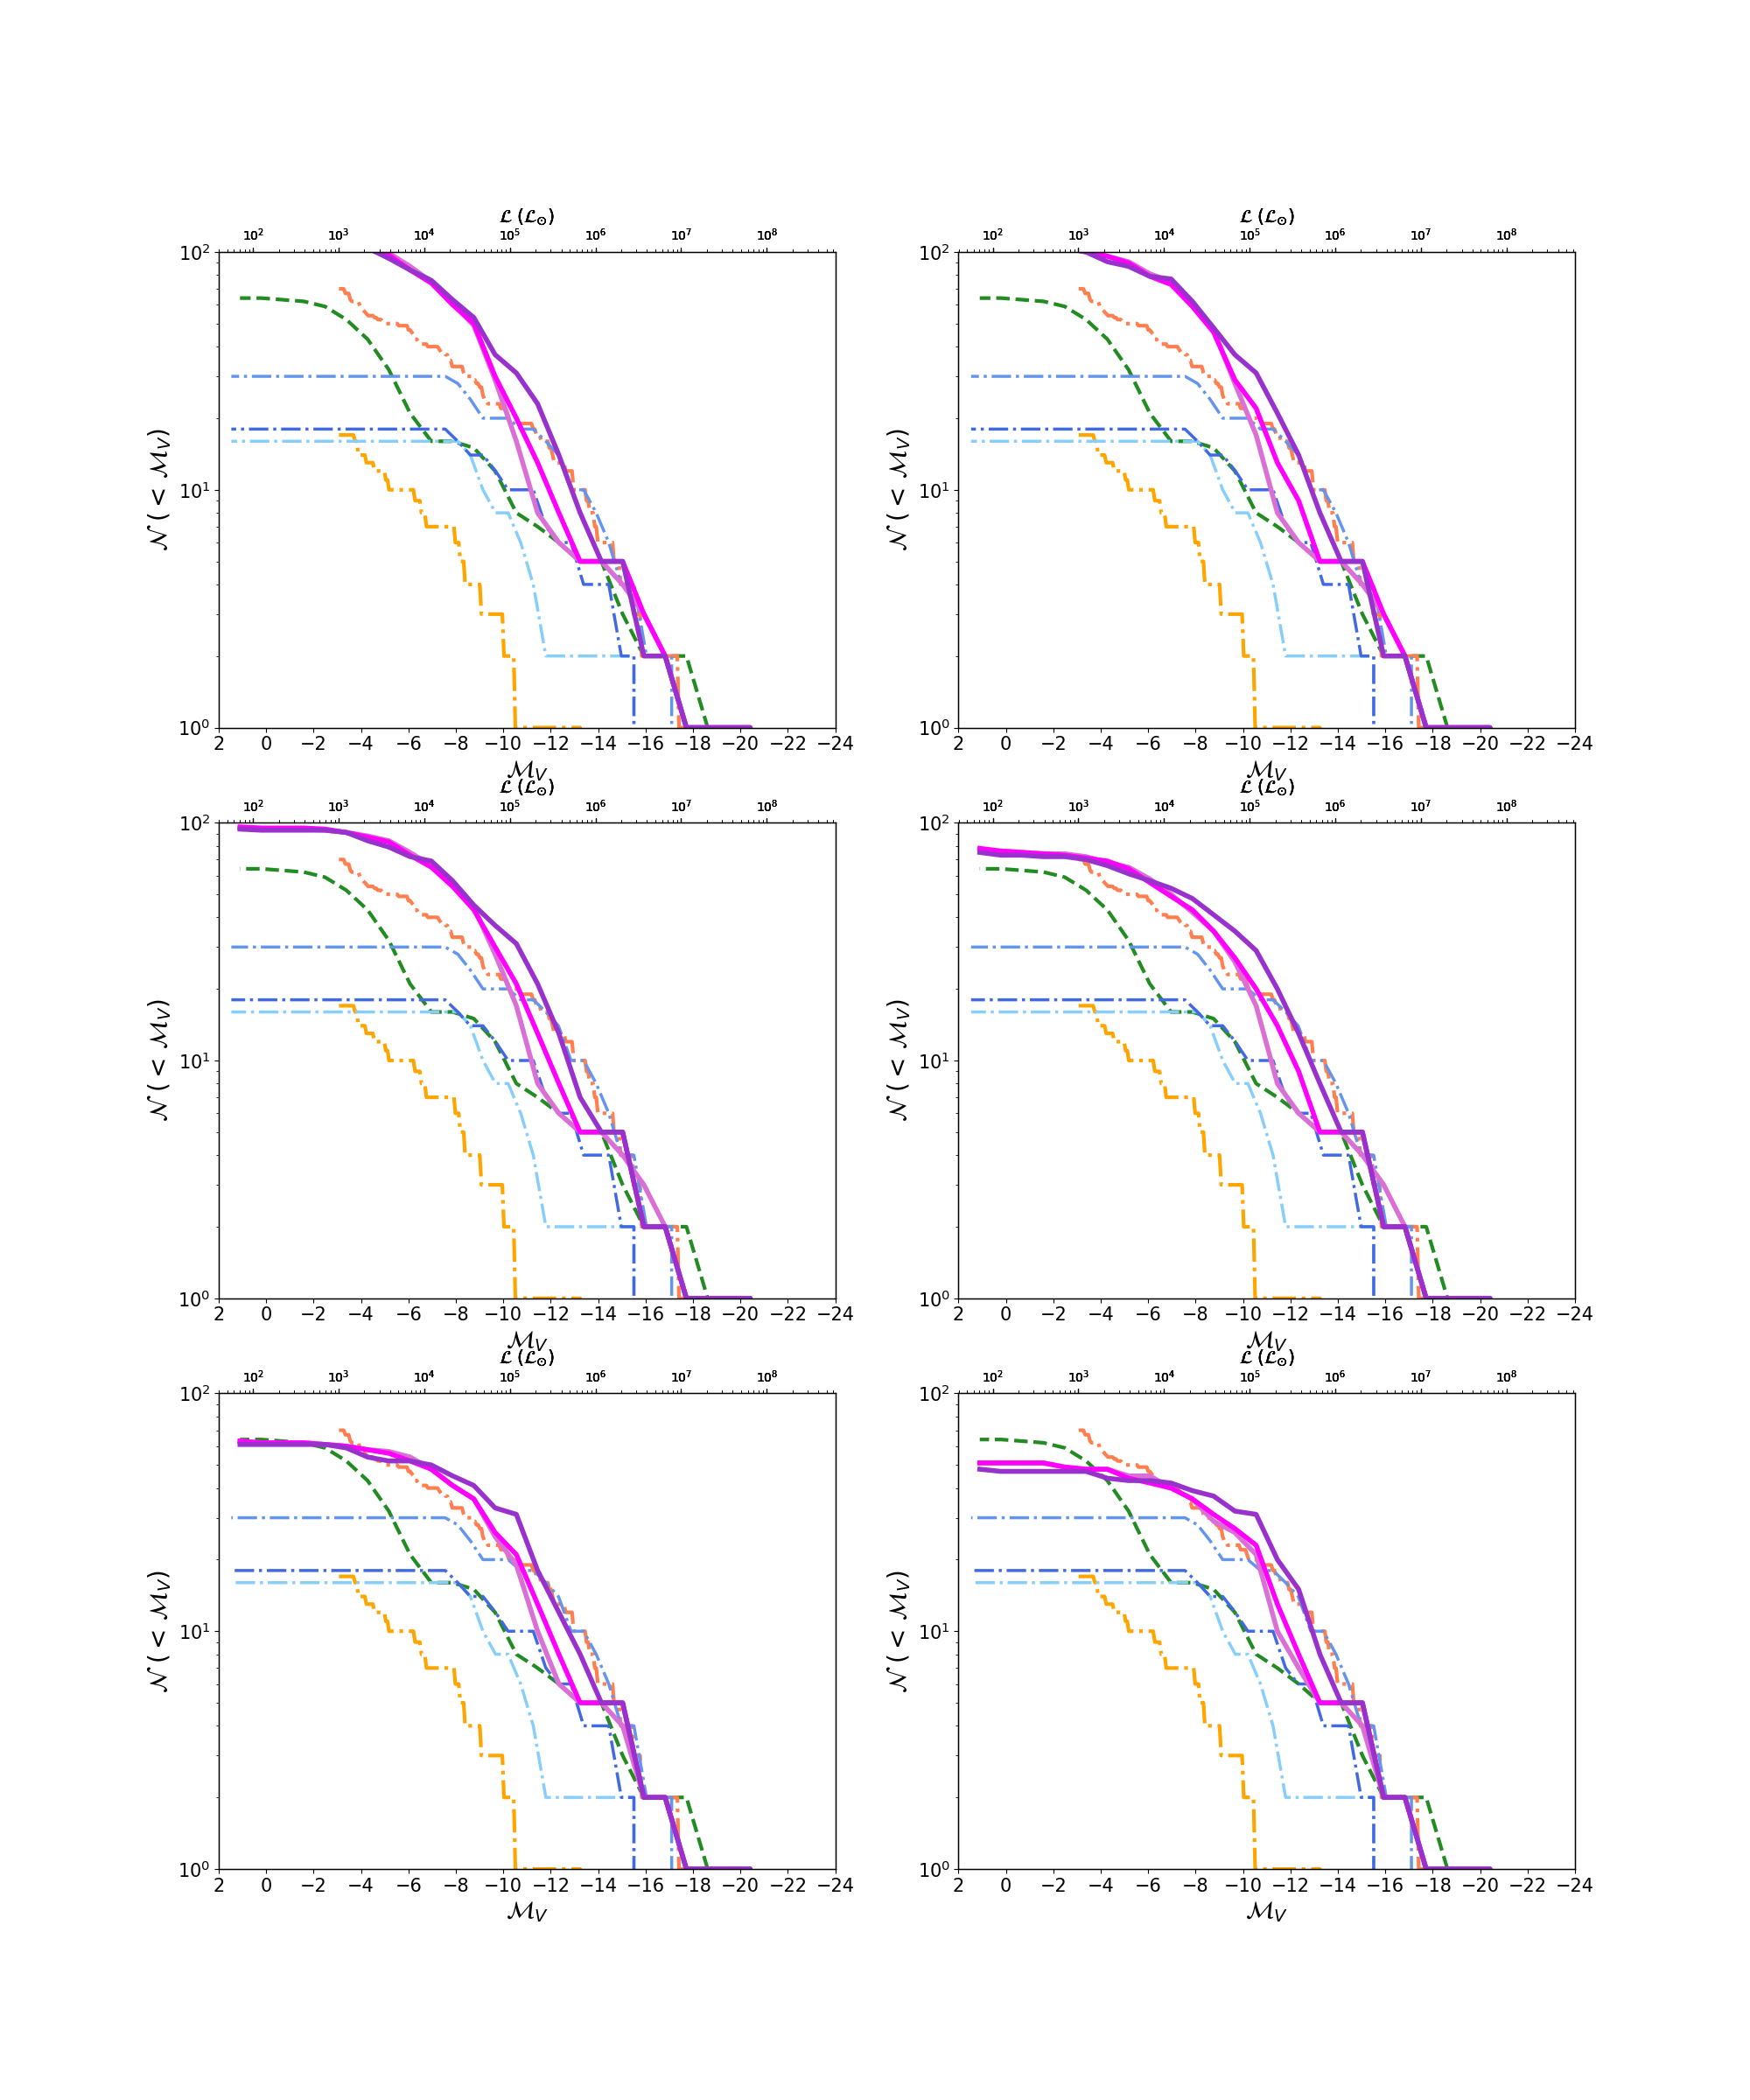

/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[

1771588847190.9556
1240112193033.6687
1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, th

1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, th

1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, th

1771588847190.9556
1240112193033.6687


/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sachiwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


1771588847190.9556
1240112193033.6687


In [14]:
fig3=plt.figure(figsize=(20,24))
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig3,'orchid','MW (z=30, $v_{cooling}$ = 18 km/s)','obs',3,2,1)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'orchid','MW ($v_{filtering}\,=\,30\,km/s$, $v_{cooling}$ = 15 km/s)','gal',3,2,1)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'fuchsia','MW ($v_{filtering}\,=\,25\,km/s$, $v_{cooling}$ = 15 km/s)','gal',3,2,1)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig3,'darkorchid','MW ($v_{filtering}\,=\,20\,km/s$, $v_{cooling}$ = 15 km/s)','gal',3,2,1)

fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling15_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig3,'orchid','MW (z=30, $v_{cooling}$ = 18 km/s)','obs',3,2,2)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling16_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'orchid','MW ($v_{filtering}\,=\,30\,km/s$, $v_{cooling}$ = 16 km/s)','gal',3,2,2)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling16_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'fuchsia','MW ($v_{filtering}\,=\,25\,km/s$, $v_{cooling}$ = 16 km/s)','gal',3,2,2)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling16_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig3,'darkorchid','MW ($v_{filtering}\,=\,20\,km/s$, $v_{cooling}$ = 16 km/s)','gal',3,2,2)

fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling18_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'orchid','MW (z=30, $v_{cooling}$ = 17 km/s)','obs',3,2,3)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling17_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'orchid','MW ($v_{filtering}\,=\,30\,km/s$, $v_{cooling}$ = 17 km/s)','gal',3,2,3)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling17_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'fuchsia','MW ($v_{filtering}\,=\,25\,km/s$, $v_{cooling}$ = 17 km/s)','gal',3,2,3)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling17_coldmode_spnv_starvesatsF_ram100_tidal01_ode_sfh390_vdis_indexShift.hdf5',fig3,'darkorchid','MW ($v_{filtering}\,=\,20\,km/s$, $v_{cooling}$ = 17 km/s)','gal',3,2,3)

fig33=plotMv('/media/sachiwee/ArmorATD/MW_testruns/instantaneous/vF_cooling_new2/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01.hdf5',fig3,'orchid','MW (z=30, $v_{cooling}$ = 18 km/s)','obs',3,2,4)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling18_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'orchid','MW ($v_{filtering}\,=\,30\,km/s$, $v_{cooling}$ = 18 km/s)','gal',3,2,4)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling18_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'fuchsia','MW ($v_{filtering}\,=\,25\,km/s$, $v_{cooling}$ = 18 km/s)','gal',3,2,4)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling18_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'darkorchid','MW ($v_{filtering}\,=\,20\,km/s$, $v_{cooling}$ = 18 km/s)','gal',3,2,4)

fig33=plotMv('/media/sachiwee/ArmorATD/MW_testruns/instantaneous/vF_cooling_new2/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01.hdf5',fig3,'orchid','MW (z=30, $v_{cooling}$ = 18 km/s)','obs',3,2,5)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'orchid','MW ($v_{filtering}\,=\,30\,km/s$, $v_{cooling}$ = 19 km/s)','gal',3,2,5)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_sfh390_vdis.hdf5',fig3,'fuchsia','MW ($v_{filtering}\,=\,25\,km/s$, $v_{cooling}$ = 19 km/s)','gal',3,2,5)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling19_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'darkorchid','MW ($v_{filtering}\,=\,20\,km/s$, $v_{cooling}$ = 19 km/s)','gal',3,2,5)

fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling20_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'orchid','MW (z=30, $v_{cooling}$ = 18 km/s)','obs',3,2,6)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF30_cooling20_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'orchid','MW ($v_{filtering}\,=\,30\,km/s$, $v_{cooling}$ = 20 km/s)','gal',3,2,6)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling20_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'fuchsia','MW ($v_{filtering}\,=\,25\,km/s$, $v_{cooling}$ = 20 km/s)','gal',3,2,6)
fig33=plotMv('/media/sachiwee/ArmorATD/MW_MAC/MWoutputs/vFcooling/vFcooling/MW_blitz_z_cV160_151_e1.7_0.3_vF20_cooling20_coldmode_spnv_starvesatsF_ram100_tidal01_sfr390.hdf5',fig3,'darkorchid','MW ($v_{filtering}\,=\,20\,km/s$, $v_{cooling}$ = 20 km/s)','gal',3,2,6)
fig3.savefig('/media/sachiwee/ArmorATD/MW_testruns/figures_MAC/Mv_cooling_vF_newdwarfs.jpg')